# How well can a model predict which sport is happening in the images?

-Change the dataset: compile the split dataset from https://www.kaggle.com/code/victorxiao4/sports-tf/data into one big dataset with 5 categories: arm wrestling, barell racing, billiards, bmx and boxing: these are the classes the model has previosuly been best at predicting (with val, test, train split and 20 classes)

-Train a sequential model from TensorFlow to predict which of the 5 classes the images belongs to

-Find out how well the model performs

-Generate plot history and save it to output folder

-Generate classification report and save it to output folder

In [1]:
#import

import numpy as np
import os
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_hub as hub
import warnings
warnings.filterwarnings('ignore')
os.environ["KMP_WARNINGS"] = "FALSE" 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

2022-05-17 19:28:55.029273: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-17 19:28:55.029310: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [10]:
# Parameters
num_classes = 5 #image categories/classes
batch_size = 64 #how many images we are looking at at a time
img_height = 224 #image dimensions 224x224
img_width = 224

In [11]:
#path to data folder with sports pictures in 5 folders of the 5 different sports
input_directory = pathlib.Path("..","..","cds-visual","Project_3", "sport_data")

In [12]:
# defining and splitting training and validation subsets

train_ds = tf.keras.utils.image_dataset_from_directory(
    input_directory,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    input_directory,
    validation_split=0.3,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 673 files belonging to 5 classes.
Using 539 files for training.
Found 673 files belonging to 5 classes.
Using 201 files for validation.


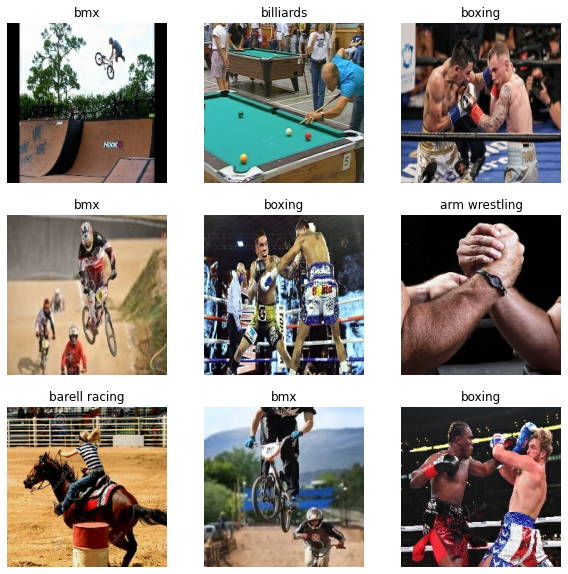

In [5]:
# Show images and its classes from train dataset (random sample every time)
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9): #show 9 examples
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8")) #show image
    plt.title(class_names[labels[i]]) #class name
    plt.axis("off") #remove height and width numbers around images

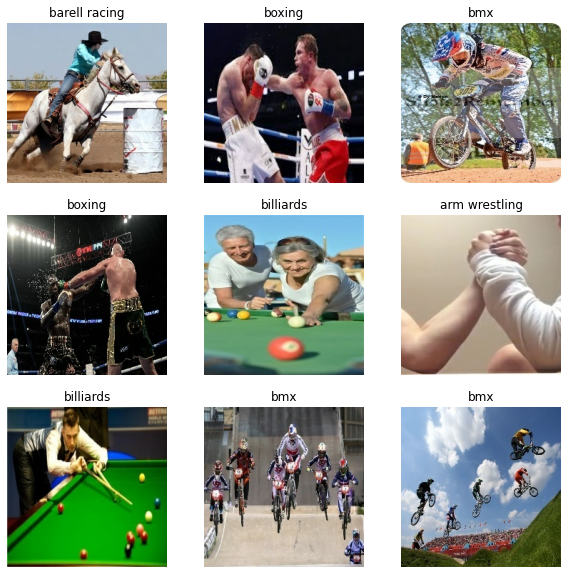

In [6]:
#Show images and its classes from test dataset (random sample every time)
class_names = val_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9): #show 9 examples
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8")) #show image
    plt.title(class_names[labels[i]]) #class name
    plt.axis("off") #remove height and width numbers around images

In [13]:
#create model
model1 = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'), #relu activation layers
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(), #flatten layer
    layers.Dense(256, activation='relu'), #hidden layers
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes) #the number of categories we want to predict
])

In [14]:
#compile and train the model
print("[INFO] training model...")

model1.compile(optimizer='adam', #adam optimizer from keras
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #loss function
    metrics=['accuracy']) #accuracy
history = model1.fit(train_ds, epochs=10, validation_data=val_ds)

[INFO] training model...
Epoch 1/10
9/9 [==============================] - 31s 3s/step - loss: 1.7018 - accuracy: 0.1892 - val_loss: 1.5885 - val_accuracy: 0.2637
Epoch 2/10
9/9 [==============================] - 30s 3s/step - loss: 1.3848 - accuracy: 0.3896 - val_loss: 0.8636 - val_accuracy: 0.6318
Epoch 3/10
9/9 [==============================] - 30s 3s/step - loss: 0.9355 - accuracy: 0.6308 - val_loss: 0.7596 - val_accuracy: 0.7164
Epoch 4/10
9/9 [==============================] - 30s 3s/step - loss: 0.8185 - accuracy: 0.6994 - val_loss: 0.7155 - val_accuracy: 0.7363
Epoch 5/10
9/9 [==============================] - 26s 3s/step - loss: 0.7262 - accuracy: 0.7421 - val_loss: 0.5330 - val_accuracy: 0.8259
Epoch 6/10
9/9 [==============================] - 30s 3s/step - loss: 0.4984 - accuracy: 0.8237 - val_loss: 0.4536 - val_accuracy: 0.8458
Epoch 7/10
9/9 [==============================] - 30s 3s/step - loss: 0.4406 - accuracy: 0.8571 - val_loss: 0.4152 - val_accuracy: 0.8408
Epoch 8/1

In [15]:
#see the layers of the model
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 56, 56, 256)      

In [16]:
#making the plot history for the model's loss and accuracy as a function

def plot_history(history, epochs):
    plt.style.use("seaborn-colorblind")
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')

    plt.title('Training and Validation Accuracy')
    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')

    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.savefig(os.path.join("output/self_assigned.png"))

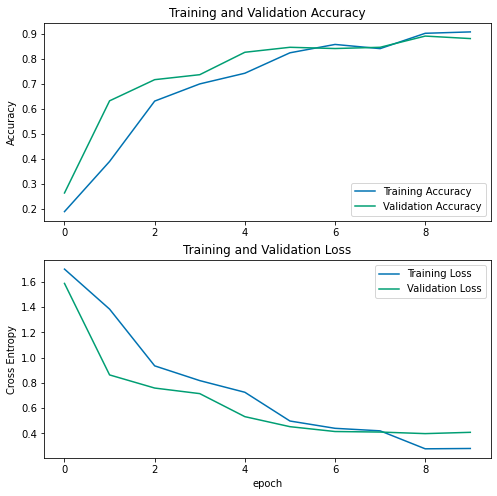

Done! Plots are generated and saved in the output folder as self_assigned.png


In [17]:
plot_history(history, 10)
plt.show()

print("Done! Plots are generated and saved in the output folder as self_assigned.png")

In [18]:
#generate classification report
test_label = np.concatenate([y for x, y in val_ds], axis= 0)

In [19]:
predictions = model1.predict(val_ds)

4/4 [==============================] - 1s 311ms/step


In [20]:
predictions.argmax(axis=1)

array([0, 3, 2, 2, 0, 4, 1, 1, 3, 2, 4, 1, 0, 2, 3, 1, 2, 2, 3, 2, 1, 0,
       3, 0, 0, 2, 2, 4, 2, 2, 2, 1, 1, 3, 4, 4, 2, 3, 0, 3, 4, 3, 4, 3,
       3, 1, 1, 3, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 3, 3, 4, 4, 0, 1, 3,
       2, 0, 0, 2, 1, 4, 4, 4, 2, 3, 3, 2, 3, 3, 1, 1, 4, 4, 2, 1, 2, 3,
       0, 2, 4, 1, 0, 2, 4, 4, 3, 2, 3, 3, 3, 1, 2, 1, 2, 3, 3, 4, 3, 0,
       1, 3, 0, 3, 2, 0, 3, 4, 2, 2, 1, 3, 1, 2, 1, 3, 3, 2, 1, 2, 1, 4,
       1, 0, 4, 1, 4, 1, 2, 0, 2, 2, 0, 0, 1, 4, 0, 2, 2, 3, 0, 4, 1, 4,
       3, 1, 2, 0, 1, 0, 1, 2, 4, 1, 4, 3, 1, 4, 3, 3, 3, 0, 4, 0, 2, 1,
       3, 2, 3, 2, 2, 1, 0, 2, 3, 4, 4, 2, 2, 3, 4, 1, 1, 1, 4, 3, 0, 3,
       0, 3, 0])

In [21]:
labels = train_ds.class_names

report = classification_report(test_label, 
                               predictions.argmax(axis=1), 
                               target_names = labels)

print(report)

               precision    recall  f1-score   support

arm wrestling       0.35      0.35      0.35        31
barell racing       0.20      0.24      0.22        37
    billiards       0.38      0.40      0.39        45
          bmx       0.15      0.13      0.14        54
       boxing       0.15      0.15      0.15        34

     accuracy                           0.25       201
    macro avg       0.25      0.25      0.25       201
 weighted avg       0.24      0.25      0.25       201



In [23]:
#Save the classification report
g = open("../../cds-visual/Project_3/output/self-assigned_cr.txt",'w')
print(report, file=g)

print("Done! Report has been generated and saved in the output folder as self-assigned.txt")

Done! Report has been generated and saved in the output folder as self-assigned.txt
